In [37]:
import os
os.chdir("C:\\Users\\rebeccalai\\OneDrive\\desktop\\movie")
import pandas as pd 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def performace(y_test,y_pred):
    m1 = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("confusionmatrix:")
    print( m1 )
    print(f"accuracy:{acc}")
    print(f"precision:{pre}")
    print(f"recall:{rec}")
    print(f"F1-score:{f1}")


# load data
url_train = "train.csv"
train = pd. read_csv (url_train)

train.describe ()
train["Lead"]. replace("Female", 1, inplace = True )
train["Lead"]. replace ("Male", 0, inplace = True )

Y = train["Lead"]
X = train.drop(["Lead","Year"],axis =1)
# X = X.iloc[:,[0,1,2,3,4,5,10,11]]
X_train , X_test , y_train , y_test = train_test_split (X, Y, test_size =0.2, random_state =1)

# s = StandardScaler ()
# X_train = s. fit_transform (X_train)
# X_test = s. fit_transform (X_test)
# # Normalize the data
# s = StandardScaler ()
# X_train = s. fit_transform (X_train)
# X_test = s. fit_transform (X_test)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
model_ada = AdaBoost.fit(X_train,y_train)
y_pred_adaboost = model_ada.predict(X_test)
performace(y_test,y_pred_adaboost)


confusionmatrix:
[[155  12]
 [ 16  25]]
accuracy:0.8653846153846154
precision:0.6756756756756757
recall:0.6097560975609756
F1-score:0.6410256410256411


In [38]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, max_features=8, n_estimators=500, subsample= 1)
model_gb = model.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)
performace(y_test,y_pred_gb)

confusionmatrix:
[[163   4]
 [ 17  24]]
accuracy:0.8990384615384616
precision:0.8571428571428571
recall:0.5853658536585366
F1-score:0.6956521739130435


>10 0.819 (0.035)
>50 0.849 (0.038)
>100 0.851 (0.037)
>500 0.836 (0.041)
>1000 0.836 (0.037)
>5000 0.821 (0.040)


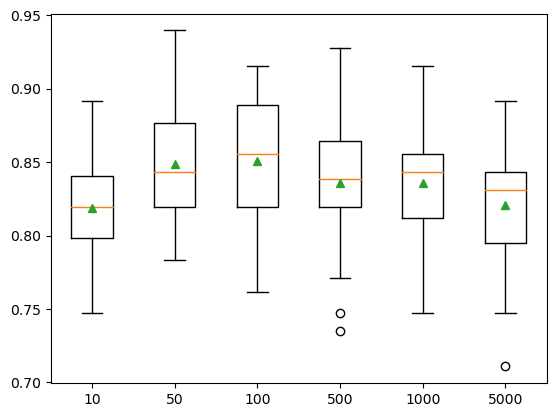

In [34]:
# Explore number  of trees
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# Adaboost hyperparameters
# explore number of trees
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
 # store the results
    results.append(scores)
    names.append(name)
 # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
# we can see In this case, we can see that that performance improves on this dataset until about 100 trees and declines after that. 
# This might be a sign of the ensemble overfitting the training dataset after additional trees are added.


>1 0.849 (0.038)
>2 0.840 (0.036)
>3 0.817 (0.034)
>4 0.826 (0.043)
>5 0.856 (0.034)
>6 0.856 (0.037)
>7 0.856 (0.036)
>8 0.855 (0.037)
>9 0.849 (0.040)
>10 0.859 (0.037)


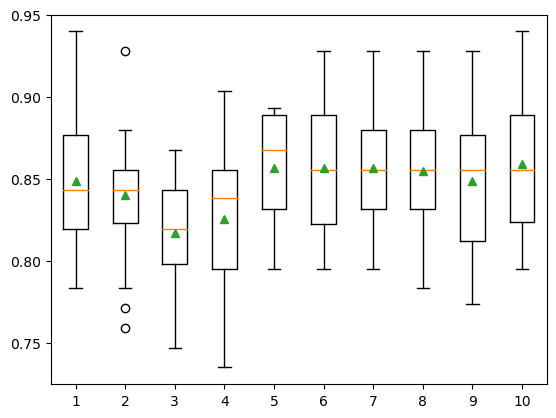

In [35]:
# Explore weak learner
# We can make the models used in the ensemble less weak (more skillful) by increasing the depth of the decision tree
from sklearn.tree import DecisionTreeClassifier
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
    # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
# Box Plot of AdaBoost Ensemble Weak Learner Depth vs. Classification Accuracy: depth=2

In [36]:
# hyperparameters， gridsearch CV
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define the model with default hyperparameters
    # explore depths from 1 to 10
for i in range(1,11):
    # define base model
    base = DecisionTreeClassifier(max_depth=i)
    # define ensemble model
    model = AdaBoostClassifier(base_estimator=base)
# define the grid of values to search
    grid = dict()
    grid['n_estimators'] = [10, 50, 100, 500]
    grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the grid search procedure
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
    # execute the grid search
    grid_result = grid_search.fit(X_train, y_train)
    # summarize the best score and configuration
    print("depth: %s Best: %f using %s" % (i, grid_result.best_score_, grid_result.best_params_))


depth: 1 Best: 0.853208 using {'learning_rate': 0.1, 'n_estimators': 500}
depth: 2 Best: 0.860045 using {'learning_rate': 0.1, 'n_estimators': 500}
depth: 3 Best: 0.859223 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 4 Best: 0.867666 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 5 Best: 0.867260 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 6 Best: 0.869268 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 7 Best: 0.870477 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 8 Best: 0.866452 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 9 Best: 0.866055 using {'learning_rate': 1.0, 'n_estimators': 500}
depth: 10 Best: 0.861240 using {'learning_rate': 1.0, 'n_estimators': 500}


In [16]:
base = DecisionTreeClassifier(max_depth=6)
# define ensemble model
model = AdaBoostClassifier(base_estimator=base)
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
y_pred_ada2 = grid_result.predict(X_test)
performace(y_test,y_pred_ada2) 

confusionmatrix:
[[162   5]
 [ 18  23]]
accuracy:0.8894230769230769
precision:0.8214285714285714
recall:0.5609756097560976
F1-score:0.6666666666666667
